# MNIST
## Loading

In [1]:
import tensorflow as tf

In [14]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [15]:
x_train, x_test = x_train / 255.0, x_test / 255.0

## Model
Building the Sequential model by stacking layers

In [16]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10)
])

## Prediction

In [17]:
predictions = model(x_train[:1]).numpy()
predictions

array([[-0.6533852 ,  0.14482024, -0.14389896, -0.75136817, -0.99446326,
         0.10279155,  0.2075993 , -0.9738234 ,  0.28784522, -0.28650537]],
      dtype=float32)

The tf.nn.softmax function converts these logits to probabilities for each class

Can do be done as the activation function of the final dense layer, but a bad idea as it makes it impossible to provide and exact and numerically stable loss calculation for all models when using a softmax output

In [18]:
tf.nn.softmax(predictions).numpy()

array([[0.06356695, 0.14121719, 0.10580309, 0.05763388, 0.04519631,
        0.135405  , 0.15036687, 0.04613885, 0.16293055, 0.09174137]],
      dtype=float32)

The losses.SpareCategoricalCrossentropy loss takes a vector of logits and a True index and returns a scalar loss for each example

The loss is the negaative log probability of the true class

In [19]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True)

In [20]:
loss_fn(y_train[:1], predictions).numpy()

1.999485

The untrained model has a loss of about 2

## Training
The Model.fit method adjusts the model parameters to minimize the loss

In [21]:
model.compile(optimizer = 'adam',
              loss = loss_fn,
              metrics = ['accuracy'])

In [22]:
model.fit(x_train, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2948 - accuracy: 0.9133
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1444 - accuracy: 0.9572
Epoch 3/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.1078 - accuracy: 0.9677
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0892 - accuracy: 0.9727
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0747 - accuracy: 0.9766


Model.evalaute method checks the model's performance on a Validation or a Testing set

In [31]:
model.evaluate(x_test, y_test, verbose = 1)

313/313 [==============================] - 1s 2ms/step - loss: 0.0719 - accuracy: 0.9780


[0.071898452937603, 0.9779999852180481]

The trained model can now be wrapped around with a softmax layer to return probability

In [32]:
probability_model = tf.keras.Sequential([
    model,
    tf.keras.layers.Softmax()
])

In [34]:
probability_model(x_test[:5])

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[2.0542620e-08, 5.4019511e-10, 1.0290047e-05, 2.9362456e-04,
        4.7601001e-10, 1.8215069e-08, 9.1634382e-14, 9.9969447e-01,
        7.7553767e-07, 8.1635085e-07],
       [2.5183641e-10, 1.3750466e-05, 9.9995816e-01, 2.6195927e-05,
        1.4603344e-16, 1.0380346e-07, 3.0328845e-08, 4.5965163e-12,
        1.8301110e-06, 5.5935063e-13],
       [2.7905895e-07, 9.9704212e-01, 9.1661408e-05, 2.1939173e-05,
        8.1209982e-05, 1.3593687e-05, 1.8769220e-05, 1.2987241e-03,
        1.4261382e-03, 5.6514027e-06],
       [9.9994588e-01, 5.1397031e-10, 2.1899818e-05, 2.8642269e-08,
        9.8739918e-07, 3.9010815e-06, 3.9328856e-06, 1.1342747e-05,
        2.2127290e-08, 1.1973714e-05],
       [6.1782788e-07, 5.6527727e-10, 8.7821428e-07, 4.1815071e-08,
        9.9884123e-01, 8.5142958e-08, 4.7145818e-06, 7.3820731e-05,
        1.5198476e-07, 1.0785246e-03]], dtype=float32)>

# Fashion MNIST

In [1]:
# tensorflow and tf.keras
import tensorflow as tf

# helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.5.0


In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [4]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [6]:
train_images.shape

(60000, 28, 28)

## Preprocessing


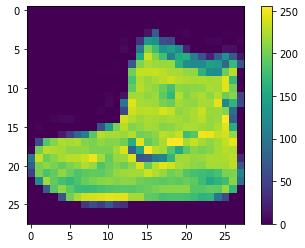

In [7]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Scale the values from \[0; 255\] to \[0; 1\]

In [8]:
train_images = train_images / 255.0
test_images = test_images / 255.0

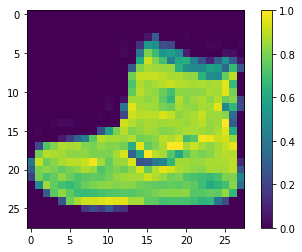

In [9]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

## Building the Model
The flatten layer takes the two dimensional array and returns a one dimensional array of the 28x28 = 784 pixels

In [10]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

### Compiling the Model
Compiling the model require few additional settings:
* Loss Function: what to minimize
* Optimizer: how the model is updated based on the data it sees and its loss function
* Metrics: monitors the training and testing steps

In [11]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## Training the Model

In [12]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 705us/step - loss: 0.4967 - accuracy: 0.8258
Epoch 2/10
1875/1875 [==============================] - 1s 700us/step - loss: 0.3732 - accuracy: 0.8660
Epoch 3/10
1875/1875 [==============================] - 1s 704us/step - loss: 0.3362 - accuracy: 0.8774
Epoch 4/10
1875/1875 [==============================] - 1s 705us/step - loss: 0.3119 - accuracy: 0.8862
Epoch 5/10
1875/1875 [==============================] - 1s 701us/step - loss: 0.2927 - accuracy: 0.8917
Epoch 6/10
1875/1875 [==============================] - 1s 709us/step - loss: 0.2802 - accuracy: 0.8968
Epoch 7/10
1875/1875 [==============================] - 1s 707us/step - loss: 0.2678 - accuracy: 0.9005
Epoch 8/10
1875/1875 [==============================] - 1s 708us/step - loss: 0.2561 - accuracy: 0.9043
Epoch 9/10
1875/1875 [==============================] - 1s 700us/step - loss: 0.2453 - accuracy: 0.9086
Epoch 10/10
1875/1875 [==============================] - 1s 708u

In [13]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print('Testing accuracy: ', test_acc)

313/313 - 0s - loss: 0.3486 - accuracy: 0.8792
Testing accuracy:  0.8791999816894531


# Text Classifcation
Basic binary classifier for sentiment analysis on an IMDB dataset

In [2]:
# tensorflow and tf.keras
import tensorflow as tf

from tensorflow.keras import layers
from tensorflow.keras import losses
from tensorflow.keras import preprocessing
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

# helper libraries
import numpy as np
import matplotlib.pyplot as plt
import os
import re
import shutil
import string

print(tf.__version__)

2.5.0


In [4]:
url = "https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz"

dataset = tf.keras.utils.get_file("aclImdb_v1", url,
                                  untar=True, cache_dir='.',
                                  cache_subdir='')

dataset_dir = os.path.join(os.path.dirname(dataset), 'aclImdb')

84131840/84125825 [==============================] - 68s 1us/step


In [5]:
os.listdir(dataset_dir)

['test', 'README', 'train', 'imdbEr.txt', 'imdb.vocab']

In [6]:
train_dir = os.path.join(dataset_dir, 'train')
os.listdir(train_dir)

['labeledBow.feat',
 'urls_pos.txt',
 'unsupBow.feat',
 'neg',
 'urls_neg.txt',
 'urls_unsup.txt',
 'unsup',
 'pos']

The 'pos' and 'neg' folders contain many single files with a review inside every one of them

In [7]:
sample_file = os.path.join(train_dir, 'pos/1181_9.txt')
with open(sample_file) as f:
    print(f.read())

Rachel Griffiths writes and directs this award winning short film. A heartwarming story about coping with grief and cherishing the memory of those we've loved and lost. Although, only 15 minutes long, Griffiths manages to capture so much emotion and truth onto film in the short space of time. Bud Tingwell gives a touching performance as Will, a widower struggling to cope with his wife's death. Will is confronted by the harsh reality of loneliness and helplessness as he proceeds to take care of Ruth's pet cow, Tulip. The film displays the grief and responsibility one feels for those they have loved and lost. Good cinematography, great direction, and superbly acted. It will bring tears to all those who have lost a loved one, and survived.


## Loading the Dataset
Preparing the dataset into a format suitable for training

The text_dataset_from_directory utility is very useful here

Because it expects the directory to contain directories, each of which being labels, and inside being individual text files for that label, we need to remove the other directories

In [8]:
remove_dir = os.path.join(train_dir, 'unsup')
shutil.rmtree(remove_dir)

Now we use the utility from tf.data, a powerful collection of data related tools, to create a tf.data.Dataset

We split the dataset into three splits: train, validation, test. The IMDB dataset already has the training and testing, so we'll create the validation using 80:20 split from the training data by using the 'validation_split' argument

In [9]:
batch_size = 32
seed = 42

raw_train_ds = tf.keras.preprocessing.text_dataset_from_directory(
    'aclImdb/train',
    batch_size=batch_size,
    validation_split=0.2,
    subset='training',
    seed=seed
)

Found 25000 files belonging to 2 classes.
Using 20000 files for training.


In [10]:
for text_batch, label_batch in raw_train_ds.take(1):
    for i in range(3):
        print("Review", text_batch.numpy()[i])
        print("Label", label_batch.numpy()[i])

Review b'"Pandemonium" is a horror movie spoof that comes off more stupid than funny. Believe me when I tell you, I love comedies. Especially comedy spoofs. "Airplane", "The Naked Gun" trilogy, "Blazing Saddles", "High Anxiety", and "Spaceballs" are some of my favorite comedies that spoof a particular genre. "Pandemonium" is not up there with those films. Most of the scenes in this movie had me sitting there in stunned silence because the movie wasn\'t all that funny. There are a few laughs in the film, but when you watch a comedy, you expect to laugh a lot more than a few times and that\'s all this film has going for it. Geez, "Scream" had more laughs than this film and that was more of a horror film. How bizarre is that?<br /><br />*1/2 (out of four)'
Label 0
Review b"David Mamet is a very interesting and a very un-equal director. His first movie 'House of Games' was the one I liked best, and it set a series of films with characters whose perspective of life changes as they get into 

To see which label is which:

In [11]:
print('Label 0:', raw_train_ds.class_names[0])
print('Label 1:', raw_train_ds.class_names[1])

Label 0: neg
Label 1: pos


### Creating the Validation set and Testing set

In [12]:
raw_val_ds = tf.keras.preprocessing.text_dataset_from_directory(
    'aclImdb/train',
    batch_size=batch_size,
    validation_split=0.2,
    subset='validation',
    seed=seed
)

Found 25000 files belonging to 2 classes.
Using 5000 files for validation.


In [13]:
raw_test_ds = tf.keras.preprocessing.text_dataset_from_directory(
    'aclImdb/test',
    batch_size=batch_size
)

Found 25000 files belonging to 2 classes.


## Preprocessing
Standardize, tokeniez, and vectorize the using the 'preprocessing.TextVectorization' layer

Standardazation is preprocessing the text, typicall removing punctuaction or HTML to simplify the dataset

Tokenization is splitting strings into tokens (eg. splitting a sentence into individual words by splitting on the whitespaces)

Vectorization is converting the tokens into numbers so they can be fed into a neural network

In [14]:
# custom function to remove HTML
def custom_standardization(input_data):
    lowercase = tf.strings.lower(input_data)
    stripped_html = tf.strings.regex_replace(lowercase, '<br />', ' ')
    return tf.strings.regex_replace(stripped_html,
                                    '[%s]' % re.escape(string.punctuation),
                                    '')

In [15]:
# TextVectorization layer to do all the afforementioned stuff
# output_mode being int creates unique integer indices for each token
# explicit maximum sequence_length adds the layer to pad or truncate sequence to fit exactly to the length

max_features = 10000
sequence_length = 250

vectorize_layer = TextVectorization(
    standardize=custom_standardization,
    max_tokens=max_features,
    output_mode='int',
    output_sequence_length=sequence_length
)

In [16]:
# make a text-only dataset (without labels), then call adapt
train_text = raw_train_ds.map(lambda x, y: x)
vectorize_layer.adapt(train_text)

In [17]:
# a function to see the result of using this layer to preprocess some data
def vectorize_text(text, label):
    text = tf.expand_dims(text, -1)
    return vectorize_layer(text), label

# retrieve a batch of 32 reviews and labels from the dataset
text_batch, label_batch = next(iter(raw_train_ds))
first_review, first_label = text_batch[0], label_batch[0]

print('Review', first_review)
print('Label', raw_train_ds.class_names[first_label])
print('Vectorized review', vectorize_text(first_review, first_label))

Review tf.Tensor(b'Great movie - especially the music - Etta James - "At Last". This speaks volumes when you have finally found that special someone.', shape=(), dtype=string)
Label neg
Vectorized review (<tf.Tensor: shape=(1, 250), dtype=int64, numpy=
array([[  86,   17,  260,    2,  222,    1,  571,   31,  229,   11, 2418,
           1,   51,   22,   25,  404,  251,   12,  306,  282,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
       

In [18]:
vectorize_layer.get_vocabulary()

['',
 '[UNK]',
 'the',
 'and',
 'a',
 'of',
 'to',
 'is',
 'in',
 'it',
 'i',
 'this',
 'that',
 'was',
 'as',
 'for',
 'with',
 'movie',
 'but',
 'film',
 'on',
 'not',
 'you',
 'are',
 'his',
 'have',
 'be',
 'he',
 'one',
 'its',
 'all',
 'at',
 'by',
 'an',
 'they',
 'from',
 'who',
 'so',
 'like',
 'her',
 'just',
 'or',
 'about',
 'has',
 'out',
 'if',
 'some',
 'there',
 'what',
 'good',
 'more',
 'when',
 'very',
 'even',
 'my',
 'she',
 'up',
 'no',
 'time',
 'would',
 'which',
 'only',
 'really',
 'story',
 'their',
 'were',
 'had',
 'see',
 'can',
 'me',
 'than',
 'we',
 'much',
 'well',
 'been',
 'get',
 'will',
 'also',
 'other',
 'people',
 'bad',
 'into',
 'do',
 'first',
 'because',
 'him',
 'great',
 'how',
 'most',
 'dont',
 'made',
 'movies',
 'then',
 'them',
 'films',
 'way',
 'make',
 'any',
 'could',
 'too',
 'characters',
 'after',
 'think',
 'watch',
 'two',
 'seen',
 'character',
 'many',
 'being',
 'acting',
 'never',
 'plot',
 'little',
 'best',
 'where',
 '

In [19]:
# finally, run the TextVectorization layer on all the datasets
train_ds = raw_train_ds.map(vectorize_text)
val_ds = raw_val_ds.map(vectorize_text)
test_ds = raw_test_ds.map(vectorize_text)

## Dataset Performance
Two methods to use to make sure I/O does not become blocking:

'.cache()' keeps data in memory after it's loaded into disk. If dataset is too large for memory, can be used to create a performant on disk cache

'.prefetch()' overlaps data preprocessing and model execution while training


In [20]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

## Creating the Model

In [50]:
embedding_dim = 16

model = tf.keras.Sequential([
    layers.Embedding(max_features + 1, embedding_dim),
    layers.Dropout(0.2),
    layers.GlobalAveragePooling1D(),
    layers.Dropout(0.2),
    layers.Dense(1)
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          160016    
_________________________________________________________________
dropout (Dropout)            (None, None, 16)          0         
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 160,033
Trainable params: 160,033
Non-trainable params: 0
_________________________________________________________________


* Embedding layer: takes the interger-encoded reviews and looks up an embedding vector for each word-index
    * Assigns each word a vector of a specified dimension, with similar words having similar vectors
    * Adds a dimension to the output array
    * Resulting dimensions are (batch, sequence, embedding)
* Global Average Pooling 1D: returns a fixed-length output vector for each example by averaging over the sequence dimensions
    * Allows the model to handle input of variable length in the simplest way possible
* This fixed length output vector feeds into the dense layer which outputs a single value

In [53]:
model.compile(
    loss=losses.BinaryCrossentropy(from_logits=True),
    optimizer='adam',
    metrics=tf.metrics.BinaryAccuracy(threshold=0.0)
)

## Training

In [56]:
epochs = 10
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/10
625/625 [==============================] - 2s 3ms/step - loss: 0.6645 - binary_accuracy: 0.6946 - val_loss: 0.6167 - val_binary_accuracy: 0.7740
Epoch 2/10
625/625 [==============================] - 2s 2ms/step - loss: 0.5502 - binary_accuracy: 0.8012 - val_loss: 0.4997 - val_binary_accuracy: 0.8226
Epoch 3/10
625/625 [==============================] - 2s 2ms/step - loss: 0.4461 - binary_accuracy: 0.8455 - val_loss: 0.4208 - val_binary_accuracy: 0.8472
Epoch 4/10
625/625 [==============================] - 2s 3ms/step - loss: 0.3786 - binary_accuracy: 0.8665 - val_loss: 0.3738 - val_binary_accuracy: 0.8612
Epoch 5/10
625/625 [==============================] - 2s 2ms/step - loss: 0.3350 - binary_accuracy: 0.8791 - val_loss: 0.3451 - val_binary_accuracy: 0.8668
Epoch 6/10
625/625 [==============================] - 2s 2ms/step - loss: 0.3046 - binary_accuracy: 0.8892 - val_loss: 0.3258 - val_binary_accuracy: 0.8712
Epoch 7/10
625/625 [==============================] - 2s 3ms/ste

In [63]:
loss, accuracy = model.evaluate(test_ds)

print('Loss:', loss)
print('Accuracy:', accuracy)

782/782 [==============================] - 1s 1ms/step - loss: 0.3101 - binary_accuracy: 0.8742
Loss: 0.3100917935371399
Accuracy: 0.8741999864578247


## History
'model.fit()' returns a 'History' object containing a dictionary detailing the training process

In [64]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

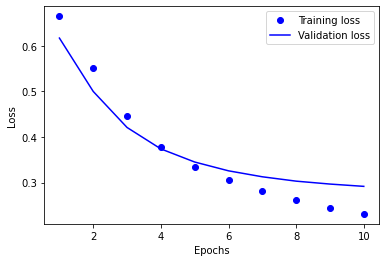

In [67]:
acc = history_dict['binary_accuracy']
val_acc = history_dict['val_binary_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

## Exporting the model
To make the model be able to predict raw string, for simplifying dempoying it

Create a new layer with the weights you just trained and the `TextVectorization` layer

In [68]:
export_model = tf.keras.Sequential([
    vectorize_layer,
    model,
    layers.Activation('sigmoid')
])

export_model.compile(
    loss=losses.BinaryCrossentropy(from_logits=False),
    optimizer='adam',
    metrics=['accuracy']
)

# testing with `raw_test_ds`, the raw strings
loss, accuracy = export_model.evaluate(raw_test_ds)
print(accuracy)

782/782 [==============================] - 2s 2ms/step - loss: 0.3101 - accuracy: 0.8742
0.8741999864578247


### Inference on new data

In [70]:
examples = [
    'This movie was amazing!',
    'This movie sucked',
    'As much as I wanted to like this movie, that was not the case',
    'This movie was not bad'
]

export_model.predict(examples)

array([[0.61785847],
       [0.4288777 ],
       [0.40692103],
       [0.32055265]], dtype=float32)

# LSTM on the Movie Reviews

In [79]:
next(iter(train_ds))

(<tf.Tensor: shape=(32, 250), dtype=int64, numpy=
 array([[9257,   15,   28, ...,    0,    0,    0],
        [8657,    3, 6619, ...,    0,    0,    0],
        [  33,  252, 1379, ...,    0,    0,    0],
        ...,
        [7472, 9944,   83, ...,    0,    0,    0],
        [ 346,  524,   71, ...,    0,    0,    0],
        [  10,   62,  455, ...,    0,    0,    0]])>,
 <tf.Tensor: shape=(32,), dtype=int32, numpy=
 array([0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
        0, 1, 1, 1, 0, 0, 1, 1, 0, 0], dtype=int32)>)

In [75]:
embedding_dim = 32

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(max_features + 1, embedding_dim),
    tf.keras.layers.LSTM(embedding_dim),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [76]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_12 (Embedding)     (None, None, 32)          320032    
_________________________________________________________________
lstm_11 (LSTM)               (None, 32)                8320      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 33        
Total params: 328,385
Trainable params: 328,385
Non-trainable params: 0
_________________________________________________________________


In [77]:
model.compile(
    loss=losses.BinaryCrossentropy(from_logits=True),
    optimizer='adam',
    metrics=tf.metrics.BinaryAccuracy(threshold=0.0)
)

In [78]:
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['acc']
)

In [79]:
epochs = 10
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/10
625/625 [==============================] - 7s 10ms/step - loss: 0.6856 - acc: 0.5366 - val_loss: 0.6351 - val_acc: 0.6654
Epoch 2/10
625/625 [==============================] - 6s 10ms/step - loss: 0.6139 - acc: 0.6770 - val_loss: 0.6182 - val_acc: 0.7196
Epoch 3/10
625/625 [==============================] - 6s 10ms/step - loss: 0.6074 - acc: 0.6554 - val_loss: 0.5265 - val_acc: 0.7732
Epoch 4/10
625/625 [==============================] - 6s 10ms/step - loss: 0.5765 - acc: 0.6991 - val_loss: 0.6935 - val_acc: 0.5208
Epoch 5/10
625/625 [==============================] - 6s 10ms/step - loss: 0.6355 - acc: 0.5794 - val_loss: 0.6887 - val_acc: 0.5316
Epoch 6/10
625/625 [==============================] - 6s 10ms/step - loss: 0.6042 - acc: 0.6075 - val_loss: 0.6450 - val_acc: 0.7158
Epoch 7/10
625/625 [==============================] - 6s 10ms/step - loss: 0.5209 - acc: 0.7772 - val_loss: 0.5738 - val_acc: 0.7358
Epoch 8/10
625/625 [==============================] - 6s 10ms/step - 

In [80]:
loss, accuracy = model.evaluate(test_ds)

print('Loss:', loss)
print('Accuracy:', accuracy)

782/782 [==============================] - 2s 3ms/step - loss: 0.6371 - acc: 0.7268
Loss: 0.6371139883995056
Accuracy: 0.7268400192260742


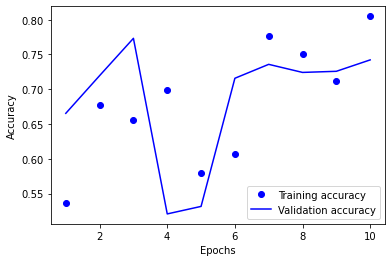

In [81]:
history_dict = history.history
history_dict.keys()

acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, acc, 'bo', label='Training accuracy')
# b is for "solid blue line"
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

## Bidirectional LSTM

In [83]:
embedding_dim = 32

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(max_features, embedding_dim),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [84]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_14 (Embedding)     (None, None, 32)          320000    
_________________________________________________________________
bidirectional (Bidirectional (None, 64)                16640     
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 65        
Total params: 336,705
Trainable params: 336,705
Non-trainable params: 0
_________________________________________________________________


In [85]:
model.compile(
    loss=losses.BinaryCrossentropy(from_logits=True),
    optimizer='adam',
    metrics=tf.metrics.BinaryAccuracy(threshold=0.0)
)

In [86]:
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['acc']
)

In [87]:
epochs = 10
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/10
625/625 [==============================] - 12s 16ms/step - loss: 0.4846 - acc: 0.7659 - val_loss: 0.3860 - val_acc: 0.8444
Epoch 2/10
625/625 [==============================] - 9s 15ms/step - loss: 0.3247 - acc: 0.8760 - val_loss: 0.3824 - val_acc: 0.8478
Epoch 3/10
625/625 [==============================] - 10s 16ms/step - loss: 0.2351 - acc: 0.9136 - val_loss: 0.3479 - val_acc: 0.8650
Epoch 4/10
625/625 [==============================] - 10s 16ms/step - loss: 0.1885 - acc: 0.9370 - val_loss: 0.4097 - val_acc: 0.8614
Epoch 5/10
625/625 [==============================] - 10s 16ms/step - loss: 0.1608 - acc: 0.9461 - val_loss: 0.4485 - val_acc: 0.8506
Epoch 6/10
625/625 [==============================] - 10s 16ms/step - loss: 0.1307 - acc: 0.9553 - val_loss: 0.4516 - val_acc: 0.8498
Epoch 7/10
625/625 [==============================] - 10s 16ms/step - loss: 0.1596 - acc: 0.9473 - val_loss: 0.4757 - val_acc: 0.8572
Epoch 8/10
625/625 [==============================] - 10s 16ms/

In [88]:
loss, accuracy = model.evaluate(test_ds)

print('Loss:', loss)
print('Accuracy:', accuracy)

782/782 [==============================] - 4s 5ms/step - loss: 0.6058 - acc: 0.8227
Loss: 0.6058320999145508
Accuracy: 0.8227199912071228


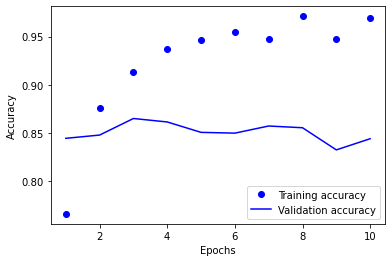

In [89]:
history_dict = history.history
history_dict.keys()

acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, acc, 'bo', label='Training accuracy')
# b is for "solid blue line"
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()